Course : Deep Learning  
Program : MBA Tech AI  
Sem : 🇻  
Academic year : 2024-25  
Instructor : Radhika Chaperneri
Name : Dhruv Pithadia  
Roll No : R013
Batch : B1
Date : 29-08-2024 

In [2]:
import keras
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras._tf_keras.keras.utils import to_categorical

In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
Y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
Y_test.shape

(10000,)

In [8]:
img_rows, img_cols = 28, 28

In [9]:
X_train_mlp = X_train.reshape(X_train.shape[0], img_rows*img_cols)
Y_train_mlp = Y_train

X_test_mlp = X_test.reshape(X_test.shape[0], img_rows*img_cols)
Y_test_mlp = Y_test

In [10]:
X_train_mlp.shape

(60000, 784)

In [11]:
print("X_train shape", X_train.shape, "Y_train shape", Y_train.shape)

X_train shape (60000, 28, 28) Y_train shape (60000,)


Y = 2 Pullover


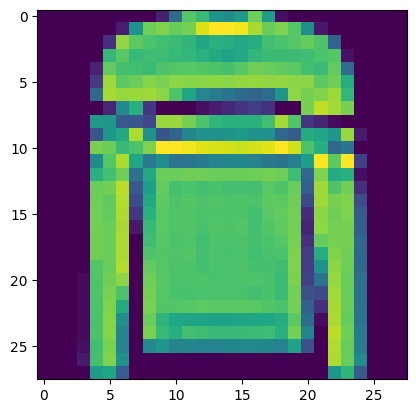

In [12]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9
 
img_index = 5
 
label_index = Y_train[img_index]
 
print ("Y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
 
plt.imshow(X_train[img_index])

In [13]:
print(X_train_mlp.shape)

(60000, 784)


In [14]:
X_train_mlp[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [15]:
X_train_mlp = X_train_mlp.astype('float32')
X_test_mlp = X_test_mlp.astype('float32')
X_train_mlp /= 255
X_test_mlp /= 255

In [16]:
X_train_mlp[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
num_classes = 10

In [18]:
Y_train_mlp = keras.utils.to_categorical(Y_train_mlp, num_classes)
Y_test_mlp = keras.utils.to_categorical(Y_test_mlp, num_classes)

In [19]:
Y_train_mlp[:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
X_train_mlp, X_val_mlp, Y_train_mlp, Y_val_mlp = train_test_split(X_train_mlp, Y_train_mlp, test_size=0.2)

In [21]:
print(X_test_mlp.shape)
print(X_val_mlp.shape)

(10000, 784)
(12000, 784)


Multi Layer Perceptron

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
#from keras.utils import np_utils

In [23]:
batch_size = 256
num_epochs = 50

In [24]:
model = Sequential()

model.add(Dense(input_dim = 784, activation='sigmoid', units=625, kernel_initializer='normal'))

model.add(Dense(input_dim = 625, activation='softmax', units=10, kernel_initializer='normal'))

model.compile(optimizer=SGD(learning_rate=0.05), loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 625)            │       490,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         6,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 496,885 (1.90 MB)

 Trainable params: 496,885 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_train_mlp, Y_train_mlp,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data=(X_val_mlp, Y_val_mlp))

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4917 - loss: 1.7314 - val_accuracy: 0.7043 - val_loss: 0.9882
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7283 - loss: 0.9150 - val_accuracy: 0.7490 - val_loss: 0.7757
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7514 - loss: 0.7581 - val_accuracy: 0.7657 - val_loss: 0.6958
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.6842 - val_accuracy: 0.7720 - val_loss: 0.6503
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.6412 - val_accuracy: 0.7862 - val_loss: 0.6166
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.6100 - val_accuracy: 0.7906 - val_loss: 0.5986
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.5834 - val_accuracy: 0.8008 - val_loss: 0.5692
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.5700 - val_accuracy: 0.

In [26]:
score  = model.evaluate(X_test_mlp, Y_test_mlp, verbose = 1)
print()
print('MLP Test Loss:' , score[0])
print('MLP Test Accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8369 - loss: 0.4514

MLP Test Loss: 0.45673564076423645
MLP Test Accuracy: 0.8345999717712402


Deep Multi Layer Perceptron